In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('kc_house_data.csv')

In [3]:
# 1. Display the data types of each column
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
# 2. Drop the columns "id" and "Unnamed: 0", and get a statistical summary
data.drop(['id', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')
print(data.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [5]:
# 3. Use the method value_counts to count the number of houses with unique floor values
# and convert it to a DataFrame
floor_counts = data['floors'].value_counts().to_frame('floor_counts')
print(floor_counts)

     floor_counts
1.0         10680
2.0          8241
1.5          1910
3.0           613
2.5           161
3.5             8


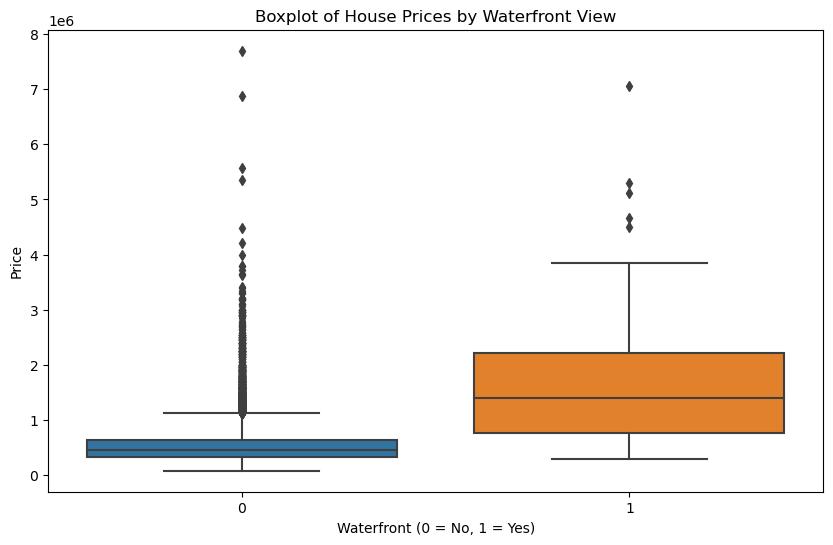

In [6]:
# 4. Use seaborn's boxplot to check price outliers for houses with and without waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Boxplot of House Prices by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

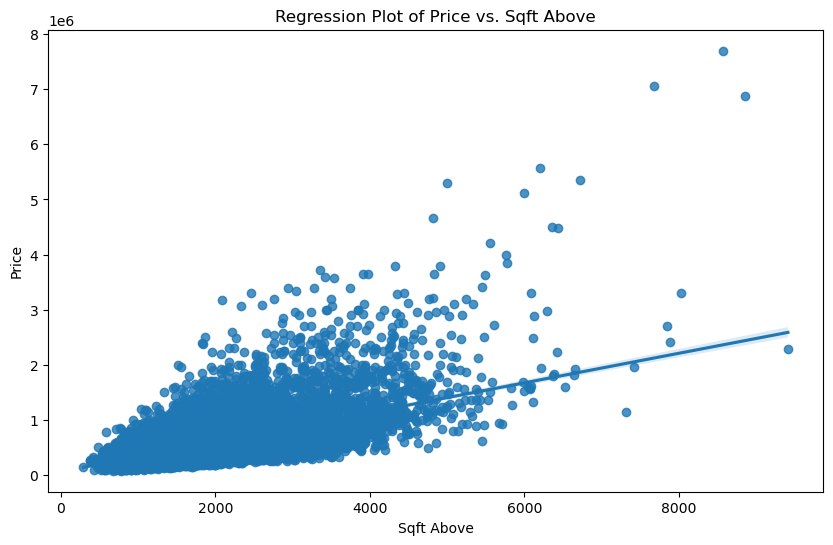

In [7]:
# Create a scatter plot with a regression line to examine correlation between 'sqft_above' and 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=data)
plt.title('Regression Plot of Price vs. Sqft Above')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear regression model
X = data[['sqft_living']]  # Predictor variable
y = data['price']  # Target variable

# Create and fit the model
lm = LinearRegression()
lm.fit(X, y)

# Predict the price and calculate R²
y_pred = lm.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² for sqft_living predicting price: {r2}")

R² for sqft_living predicting price: 0.4928532179037931


In [9]:
# List of predictor features
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']

# Predictor variables
X = data[features]
y = data['price']

# Create and fit the model
lm.fit(X, y)

# Predict the price and calculate R²
y_pred = lm.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² for multiple features predicting price: {r2}")


R² for multiple features predicting price: 0.657717260844526


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline that scales, performs polynomial transformation, and fits a linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lm', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Predict the price and calculate R²
y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² for pipeline with polynomial transform: {r2}")

R² for pipeline with polynomial transform: 0.751346594734957


In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict and calculate R² for the test data
y_pred_test = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_test)
print(f"R² for Ridge regression with test data: {r2_ridge}")

R² for Ridge regression with test data: 0.6614734596866669


In [12]:
# Create a second-order polynomial transformer
poly = PolynomialFeatures(degree=2)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model on the transformed data
ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)

# Predict and calculate R² for the test data
y_pred_test_poly = ridge_poly_model.predict(X_test_poly)
r2_poly_ridge = r2_score(y_test, y_pred_test_poly)
print(f"R² for Ridge regression with polynomial features: {r2_poly_ridge}")

R² for Ridge regression with polynomial features: 0.7003486861072039
